## The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year andprice. Can you predict the possible price of a 2022 model second-hand grand i10?Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better.

## Importing required Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [64]:
 data=pd.read_csv(r"C:\Users\Radhika K J\Downloads\car_age_price.csv")

In [65]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


## Checking the Null Values of the dataset

In [66]:
data .isna().sum()

Year     0
Price    0
dtype: int64

## Checking Correlation between Year and Price

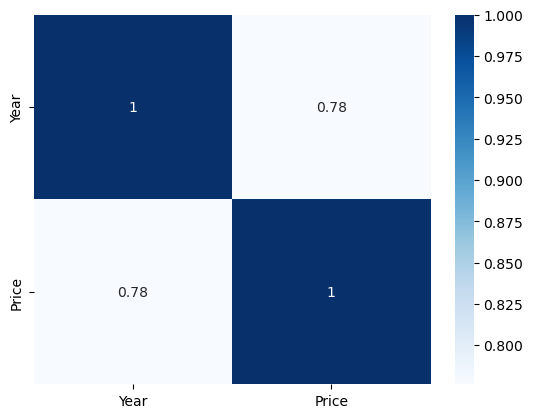

In [67]:
corr_matrix =data.corr()
sns.heatmap(corr_matrix,annot=True,cmap ='Blues')
plt.show()

In [68]:
x = data.drop(['Price'],axis=1) ##independent variable i.e, predictor
y = data['Price'] ##dependent variable i.e, target variable

In [69]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [70]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split ## import libraries 

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =42) ##splitting the data into training and testing data

In [73]:
##import linear regression and lasso regression from scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [74]:
#train the model
lr = LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)
print('Linear Regression Score',lr.score(x_test,y_test))##

Linear Regression Score 0.36759313425902185


## Exploring our Results

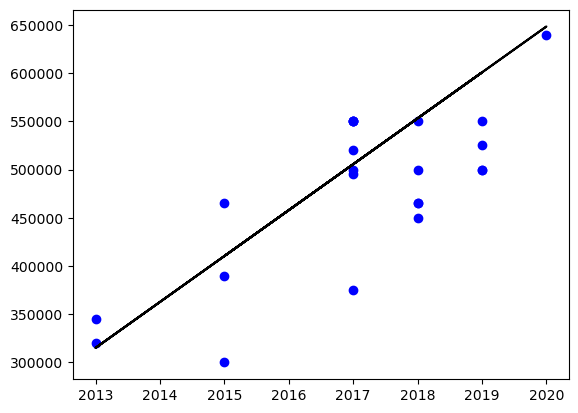

In [75]:
y_pred =model.predict(x_test)
plt.scatter (x_test,y_test,color ='b')
plt.plot(x_test,y_pred,color ='k')
plt.show()
# Data Scatter of Predicted Values

## The low accuracy score of our model suggests that our reggressive model has not fit very well with the existing data. This suggests that our data is not suitable for linear regression. But sometimes,a dataset may accept a linear regressor if we consider only a part of it.Let us check for that possibility.

## Evaluation Metrics for Regression
  Atlast , we check the performance of the Linear Regression model with help of evaluation metrics .For Regression algorithms we widely use mean absolute error and mean squared error metrics to check the model performance.

In [76]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = mean_squared_error(y_test,predictions,squared= False)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)

MAE: 53534.77957001264
MSE: 4326906256.829671
RMSE: 65779.22359552195


## Lasso Regression

In [77]:
model_lasso =  Lasso(alpha =0.01)
model_lasso.fit(x_train,y_train)
pred_train_lasso = model_lasso.predict(x_train)
print('MSE for Lasso Regression training data:',np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print('R2 for Lasso REgression training data:',r2_score(y_train,pred_train_lasso))

pred_test_lasso = model_lasso.predict(x_test)
print('MSE for Lasso Regression testing Data:',np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print('R2 for Lasso Regression Testing Data:',r2_score(y_test,pred_test_lasso))
print('Model Score for Lasso Regression:',lasso.score(x_test,y_test))

MSE for Lasso Regression training data: 55743.0286777069
R2 for Lasso REgression training data: 0.6389354253755748
MSE for Lasso Regression testing Data: 65779.22006201117
R2 for Lasso Regression Testing Data: 0.3675932022019466
Model Score for Lasso Regression: 0.3675999284778446


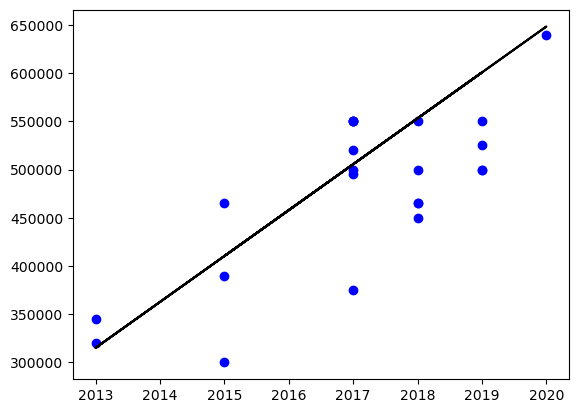

In [78]:
y_pred_lasso =lasso.predict(x_test)
plt.scatter (x_test,y_test,color ='b')
plt.plot(x_test,y_pred_lasso,color ='k')
plt.show()
# Data Scatter of Predicted Values

## The low accuracy score of our model suggests that our reggressive model has not fit very well with the existing data. This suggests that our data is not suitable for lasso regression. But sometimes,a dataset may accept a lasso regressor if we consider only a part of it.

## Prediction Price of a Car in 2022

In [81]:
target_year = [[2022]]
pred_year = model.predict(target_year)

C:\Users\Radhika K J\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [82]:
print('Predicted Price of a car in 2022:',pred_year)

Predicted Price of a car in 2022: [743601.61594504]


## Conclusion:
In this Dataset ,the linear regression score and lasso regression score both are low accuracy score as we checked.Our Regressive model has not fit very well with existing data.This suggests that our data is not suitable for both regression.